In [129]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math 
from collections import Counter


In [130]:
data = pd.read_csv("data/survey_results_public.csv")
data_schema= pd.read_csv("data/survey_results_schema.csv")


data.shape


(88883, 85)

In [131]:
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', None)

In [132]:
data_schema

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open sour...
5,Employment,Which of the following best describes your cur...
6,Country,In which country do you currently reside?
7,Student,"Are you currently enrolled in a formal, degree..."
8,EdLevel,Which of the following best describes the high...
9,UndergradMajor,What was your main or most important field of ...


                                                           მონაცემთა დამუშავება 

                                                ზრდა-კლების მიხედვით დალაგების ფუნქცია 

In [133]:
def sort_dict_by_value(Dictionary, reverse = False):        # ალაგებს ზრდის-კლების მიხედვით 
    return dict(sorted(Dictionary.items(), key = lambda x: x[1], reverse = reverse)) 

                                                         გრაფიკის აგების ფუნქცია    

In [134]:

def Build_Barh( key_Phrases , Quantity , interviewed_Numbers ,style , x_axis_visible,title):
    
    fig, ax = plt.subplots()


    langs = key_Phrases

    langs_users_num = np.array(Quantity)

    total = len(interviewed_Numbers)

    percent = langs_users_num/total*100


    new_labels = [i+'  {:.1f}%'.format(j) for i, j in zip(langs, percent)]   # პროცენტობის სიზუსტე


    plt.barh(langs, langs_users_num)  # თვითონ ნახაზი
    plt.yticks(range(len(langs)), new_labels) # პროცენტობის გამოსახვა და ღერძების განლაგება



    for spine in ax.spines.values():    # ვერდიკალური ხაზების მოშორება
        spine.set_visible(False)

    ax.axes.get_xaxis().set_visible(x_axis_visible)  # იქს ღეძზე მნიშვნელობების დასმა მოშორება 
    ax.tick_params(axis="y", left=False)
    
    plt.style.use(style)   # ნახაზის სტილი

    plt.title(title)  # add title

    # reset the plot configurations to default
    #plt.rcdefaults()
    
    # update the overall font size
    #plt.rcParams.update({'font.size':6})

    # change the fontsize of the xtick and ytick labels
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)

    # change the fontsize of axes title
    #plt.rc('axes', titlesize=20)


    plt.show()

In [135]:

def Build_Barh_sizes( key_Phrases , Quantity , interviewed_Numbers ,style , x_axis_visible, sizes, title ):
    
    fig, ax = plt.subplots(figsize=(sizes))


    langs = key_Phrases

    langs_users_num = np.array(Quantity)

    total = len(interviewed_Numbers)

    percent = langs_users_num/total*100


    new_labels = [i+'  {:.1f}%'.format(j) for i, j in zip(langs, percent)]   # პროცენტობის სიზუსტე


    plt.barh(langs, langs_users_num)  # თვითონ ნახაზი
    plt.yticks(range(len(langs)), new_labels) # პროცენტობის გამოსახვა და ღერძების განლაგება



    for spine in ax.spines.values():    # ვერდიკალური ხაზების მოშორება
        spine.set_visible(False)

    ax.axes.get_xaxis().set_visible(x_axis_visible)  # იქს ღეძზე მნიშვნელობების დასმა მოშორება 
    ax.tick_params(axis="y", left=False)
    
    plt.style.use(style)   # ნახაზის სტილი 

    plt.title(title)  # add title
    # reset the plot configurations to default
    #plt.rcdefaults()
    
    # update the overall font size
    #plt.rcParams.update({'font.size':6})

    # change the fontsize of the xtick and ytick labels
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)

    # change the fontsize of axes title
    #plt.rc('axes', titlesize=20)
    
    plt.show()

In [136]:

def Build_Barh_sizes_withot_percent (key_Phrases , Quantity  ,style , x_axis_visible, sizes, title ) :
    
    fig, ax = plt.subplots(figsize=(sizes))

    langs = key_Phrases

    langs_users_num = np.array(Quantity)


    new_labels = [i+'  {:.1f}'.format(j) for i, j in zip(langs, Quantity)]   # პროცენტობის სიზუსტე


    plt.barh(langs, langs_users_num)  # თვითონ ნახაზი
    plt.yticks(range(len(langs)), new_labels) # პროცენტობის გამოსახვა და ღერძების განლაგება



    for spine in ax.spines.values():    # ვერდიკალური ხაზების მოშორება
        spine.set_visible(False)

    ax.axes.get_xaxis().set_visible(x_axis_visible)  # იქს ღეძზე მნიშვნელობების დასმა მოშორება 
    ax.tick_params(axis="y", left=False)

    plt.style.use(style)   # ნახაზის სტილი 

    plt.title(title)  # add title
    # reset the plot configurations to default
    #plt.rcdefaults()

    # update the overall font size
    #plt.rcParams.update({'font.size':6})

    # change the fontsize of the xtick and ytick labels
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)

    # change the fontsize of axes title
    #plt.rc('axes', titlesize=20)

    plt.show()



                                                        სიების სორტირების ფუქნცია

In [137]:
def list_sorter_counter(filtered_list):
  
  global key_Phrases    # გამოვაცხადე გლობალურ ცვლადებად რათა სხვა ფუნქციებში გამოვიყენო
  global Quantity       # გამოვაცხადე გლობალურ ცვლადებად რათა სხვა ფუნქციებში გამოვიყენო
  

  union = []                          # ერთი დიდი სია 

  for i in filtered_list:
      for k in i :                    # ერთ დიდი სიაში აერთიანებს ყველაფერს 
          union.append(k)

  Counted = Counter(union)             # დიდ სიაში ითვლის რაში რა რამდენჯერ მეორდება



  Counted = sort_dict_by_value(Counted, False)  #იყენებს ძემოთა ფუქნციას


  key_Phrases = []  #ინახავს ფრაზებს
  Quantity = []   # ინახავს რაოდენობას 

  

  items = Counted.items()    # ფაქტიურად დიქშინარის გარდაქმნის ლისთად

  for item in items:        # ანაწილებს ფრაზებს და რაოდენობებს სათანადო სიებში
      key_Phrases.append(item[0])   # უშვებს ფრაზებს
      Quantity.append(item[1])      # უშვებს რიცხვით მნიშვნელობებს



                                                            მონაცემთა დამუშავება

                                                                Developer Type      

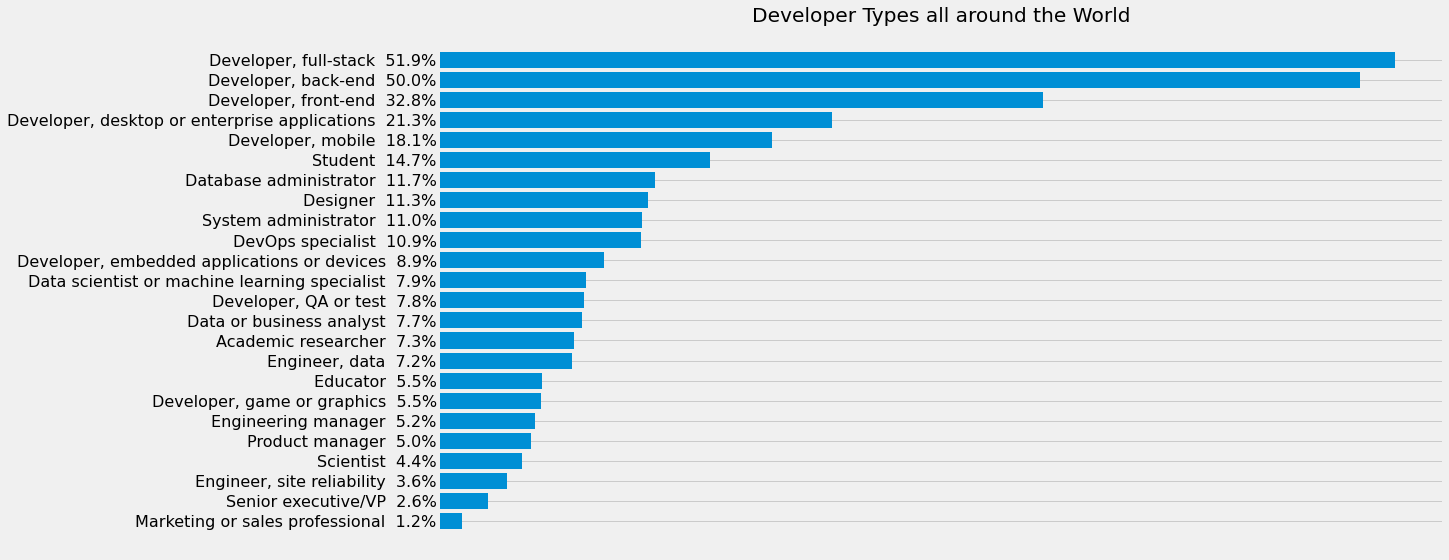

In [138]:
DevType = data["DevType"]    # ვიაძახებ მხოლოდ დეველოპერების პროფესიებს
 
DevType.dropna( inplace=True)   # ვფილტრავ და ვაშორებ ცარიელ ადგილებს

DevType = DevType.str.split(';')  # ვხლიჩავ გამყოფ ნიშან ;- თან და ვწერ სიებში


list_sorter_counter(DevType)  # ავტომატური სორტირება

Build_Barh_sizes( key_Phrases , Quantity, DevType ,"fivethirtyeight", False , (16,9), "Developer Types all around the World") # ვაგებთ გრაფიკს


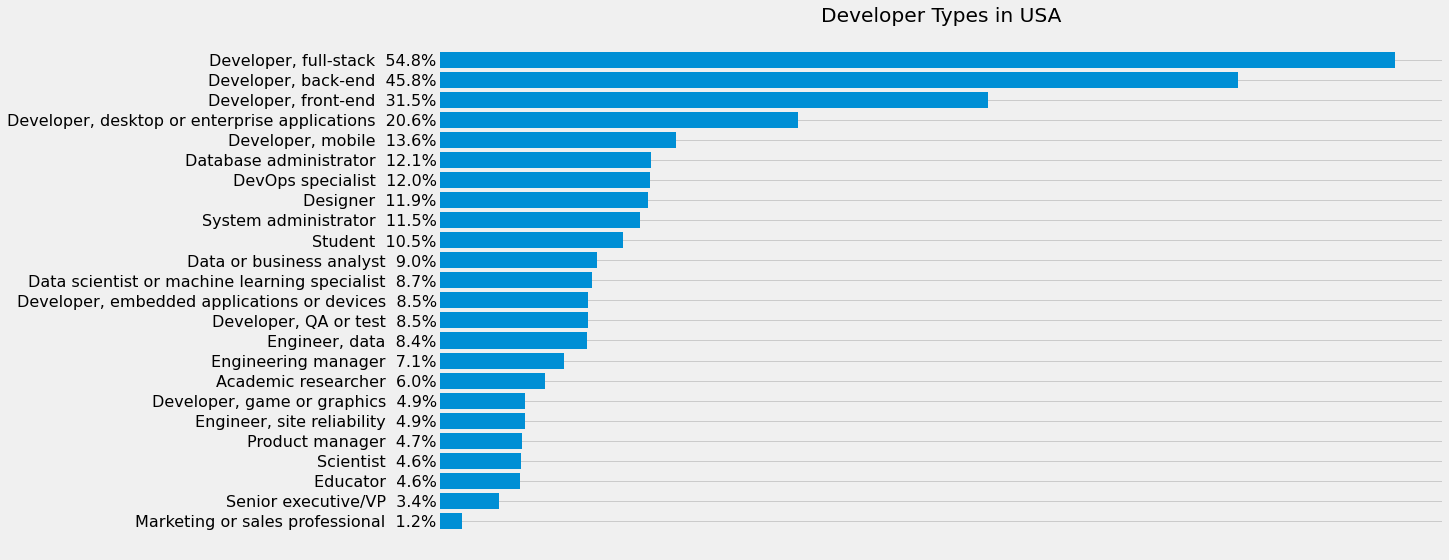

In [139]:

DevType_Filtered = data["DevType"]    # ვიაძახებ მხოლოდ დეველოპერების პროფესიებს
 
DevType_Filtered.dropna( inplace=True)  # ვფილტრავ და ვაშორებ ცარიელ ადგილებს

DevType =data[(DevType_Filtered != "NaN") & (data["Country"] == "United States")]  # ვიღებთ მხოლოდ იმ მონაცემებს რომელიც თანხვედრაში მოდის USA-სთან



New_DevType = DevType["DevType"]  # ვინაცავთ ახალ ცვლადში

New_DevType = New_DevType.str.split(';')  # ვხლიჩავ გამყოფ ნიშან ;- თან და ვწერ სიებში



list_sorter_counter(New_DevType)   # ავტომატური სორტირება

Build_Barh_sizes( key_Phrases , Quantity, DevType ,"fivethirtyeight", False , (16,9), "Developer Types in USA") # ვაგებთ გრაფიკს


                                                                    OpenSourcer

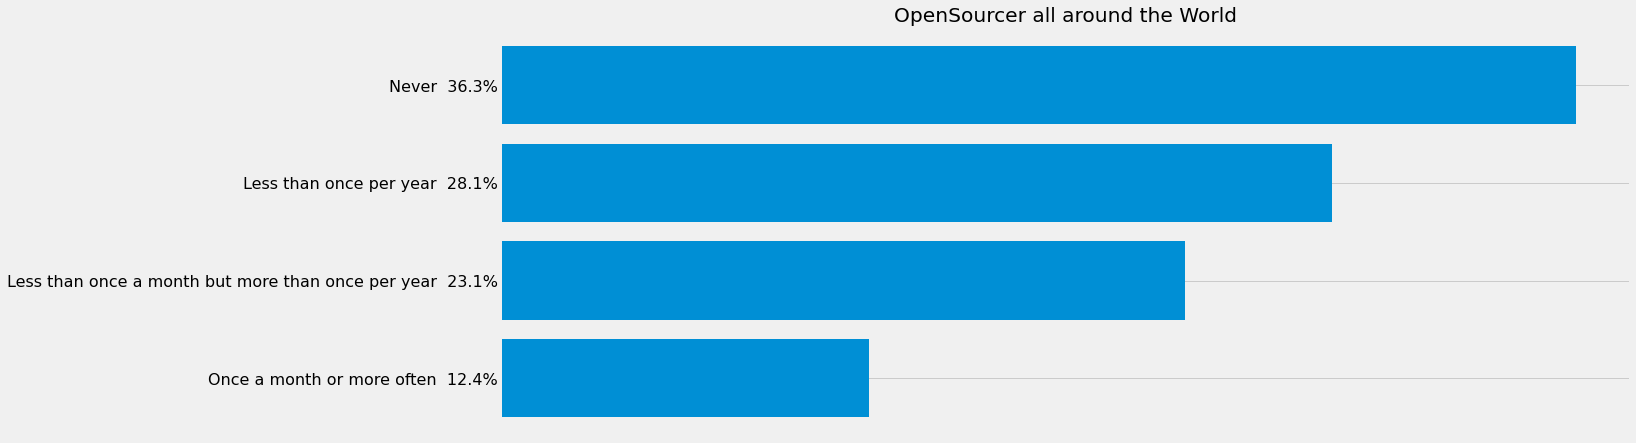

In [140]:
OpenSourcer = data["OpenSourcer"]  # ვიხებთ მხოლოდ OpenSourcer-ის ინფოს

counted = Counter(OpenSourcer)  # ვითვლით OpenSourcer-ების პასუხებს

Counted_sorted = sort_dict_by_value(counted, False)  # ვალაგებთ ზრდის-კლების მიხედვით OpenSourcer-ის პასუხებს

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, OpenSourcer ,"fivethirtyeight", False , (18,7), "OpenSourcer all around the World")   # ვაგებთ გრაფიკს


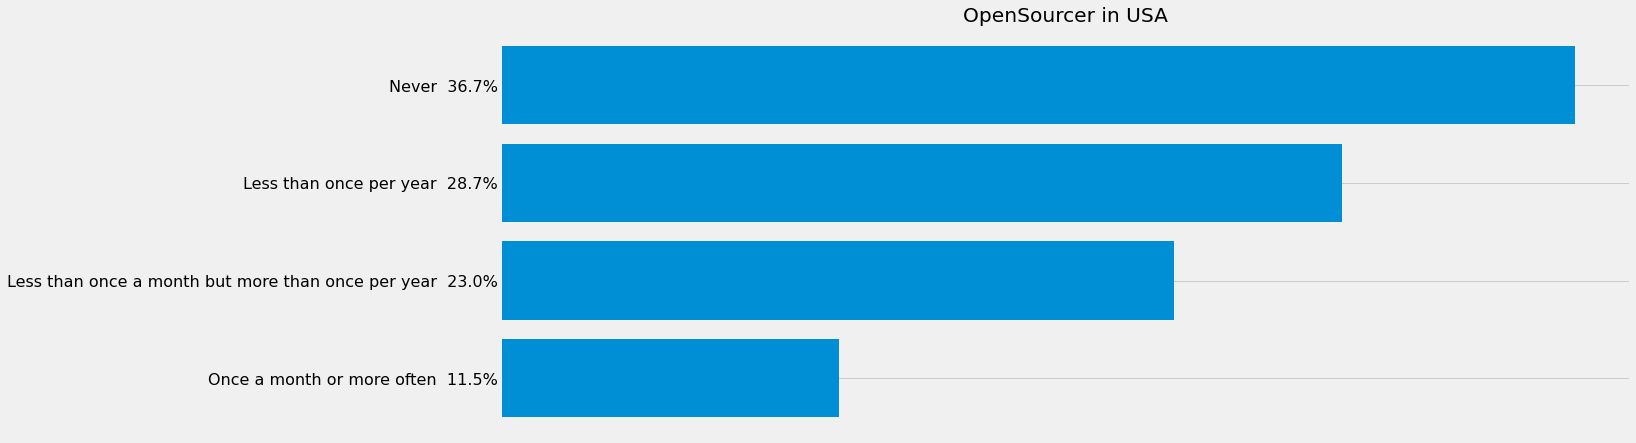

In [141]:
OpenSourcer = data["OpenSourcer"]    # ვიაძახებ მხოლოდ დეველოპერების პროფესიებს
 
OpenSourcer.dropna( inplace=True)   # ვაცლით ცარიელ რაღაცეებს

OpenSourcer =data[(OpenSourcer != "NaN") & (data["Country"] == "United States")]  # ვიღებთ მხოლოდ იმ მონაცემებს რომელიც თანხვედრაში მოდის USA-სთან

New_OpenSourcer = OpenSourcer["OpenSourcer"]  # ვინახავთ ახალ ცვლადში 

counted = Counter(New_OpenSourcer)  # ვითვლით OpenSourcer-ების პასუხებს რომელიბიც არიან USA-დან

Counted_sorted = sort_dict_by_value(counted, False)  # ვალაგებთ ზრდის-კლების მიხედვით OpenSourcer-ის პასუხებს, რომელიბიც არიან USA-დან

key_Phrases=[]      # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]         # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:    #ვანაწილებთ ლისთებში
    key_Phrases.append(i)       # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i]) # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, New_OpenSourcer ,"fivethirtyeight", False , (18,7), "OpenSourcer in USA")  # ვაგებთ გრაფიკს


                                                                    Hobbyist

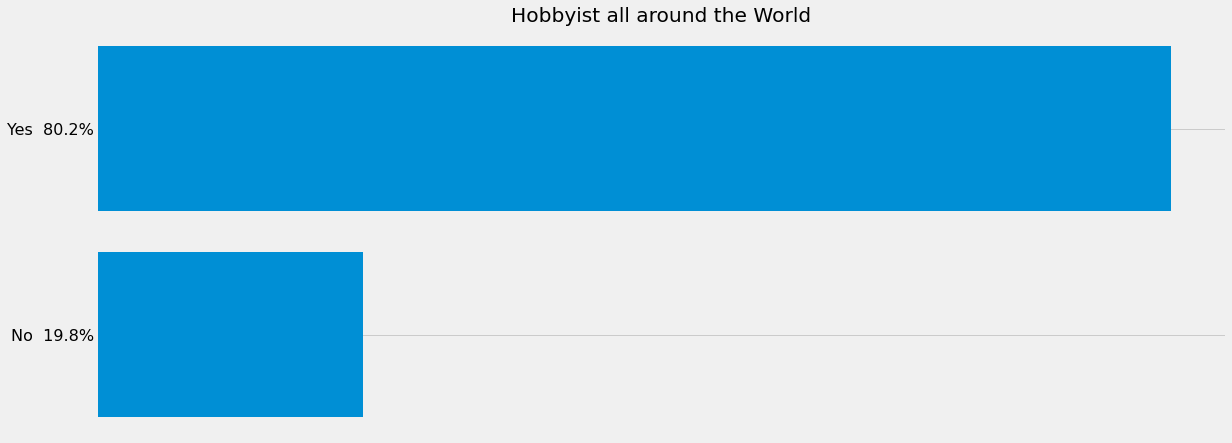

In [142]:
Hobbyist = data["Hobbyist"]    # ვიაძახებ მხოლოდ დეველოპერების პროფესიებს
 
Hobbyist = data["Hobbyist"]  # ვიხებთ მხოლოდ Hobbyist-ის ინფოს

counted = Counter(Hobbyist)  # ვითვლით Hobbyist-ების პასუხებს

Counted_sorted = sort_dict_by_value(counted, False)  # ვალაგებთ ზრდის-კლების მიხედვით Hobbyist-ის პასუხებს

key_Phrases=[]  # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]     # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:   #ვანაწილებთ ლისთებში
    key_Phrases.append(i)  # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, Hobbyist ,"fivethirtyeight", False , (18,7), "Hobbyist all around the World")   # ვაგებთ გრაფიკს

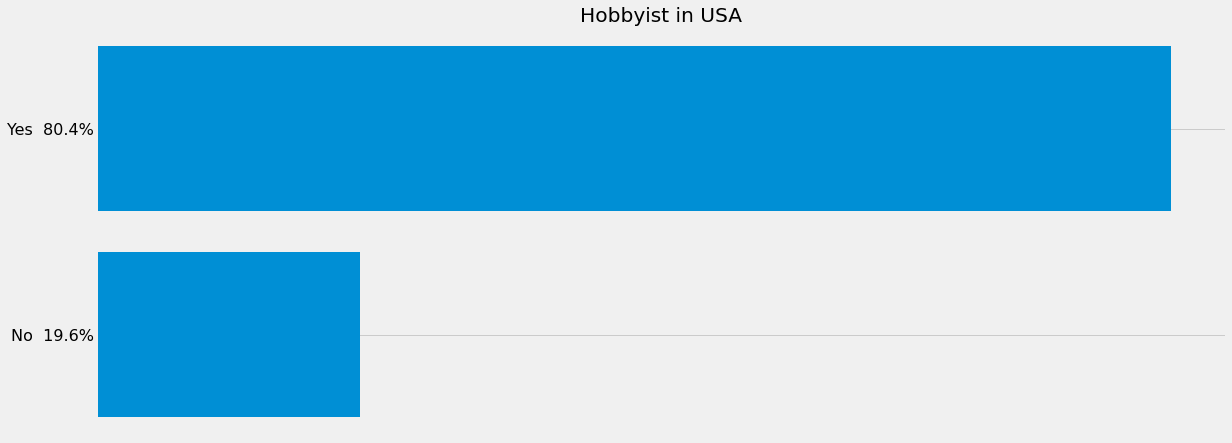

In [143]:
Hobbyist = data["Hobbyist"]    # ვიაძახებ მხოლოდ დეველოპერების პროფესიებს
 
Hobbyist.dropna( inplace=True)   # ვაცლით ცარიელ რაღაცეებს

Hobbyist =data[(Hobbyist != "NaN") & (data["Country"] == "United States")]  # ვიღებთ მხოლოდ იმ მონაცემებს რომელიც თანხვედრაში მოდის USA-სთან

New_Hobbyist = Hobbyist["Hobbyist"]  # ვინახავთ ახალ ცვლადში 

counted = Counter(New_Hobbyist)  # ვითვლით Hobbyist-ების პასუხებს რომელიბიც არიან USA-დან

Counted_sorted = sort_dict_by_value(counted, False)  # ვალაგებთ ზრდის-კლების მიხედვით Hobbyist-ის პასუხებს, რომელიბიც არიან USA-დან

key_Phrases=[]      # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]         # ვქმნით რაოდენოის შესანახ ლისთს

for i in Counted_sorted:    #ვანაწილებთ ლისთებში
    key_Phrases.append(i)       # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(counted[i]) # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, New_Hobbyist ,"fivethirtyeight", False , (18,7), "Hobbyist in USA")  # ვაგებთ გრაფიკს

                                                        Years Since Learning to Code

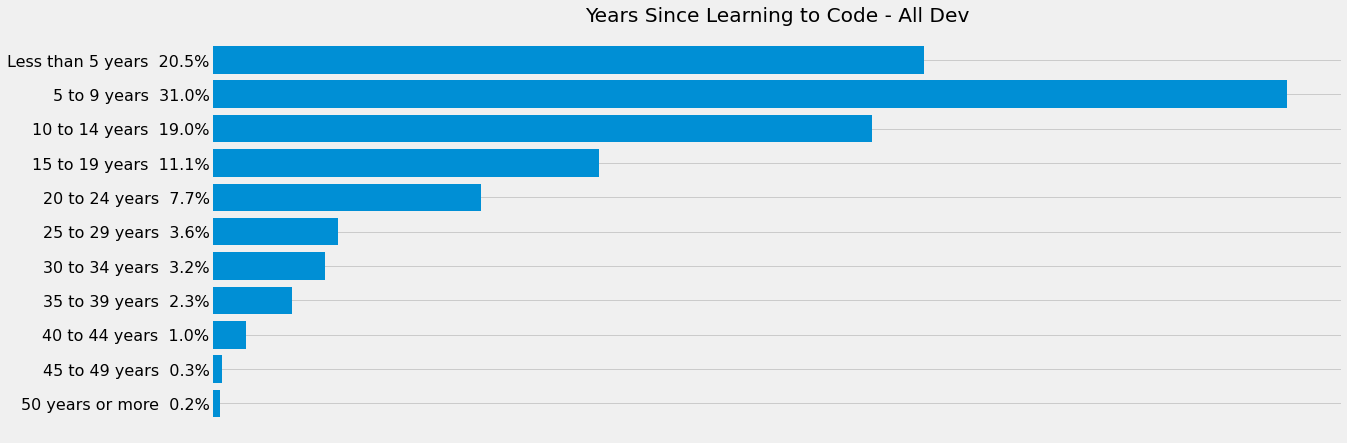

In [144]:
YearsCode = data["YearsCode"]   # ვიღებ საჭირო იფორმაციის სვეტს
YearsCode=YearsCode.dropna()  # ვფილტრავ სიცარიელეებისკან

full_info = {}   # ვქმნი დიქშინარის სადაც შევძლებ პასუხების ჩასმას

def Stacking():   # ეს ფუქნცია ალაგებს ცვლადებს

    global full_info

    Less_than_5 = []
    from_5_9 = []
    from_10_14 = []
    from_15_19 = []
    from_20_24 = []
    from_25_29 = []
    from_30_34 = []
    from_35_39 = []
    from_40_44 = []
    from_45_49 = []
    more_50 = []



    for i in YearsCode:   #გამნაწილებელი ფუქნცია

        if i in ["1", "2" ,"3" ,"4", "Less than 1 year"]:
            Less_than_5.append(i)
        elif i in ["5","6","7","8","9"]:
            from_5_9.append(i)
        elif i in ["10","11","12","13","14"]:
            from_10_14.append(i)
        elif i in ["15","16","17","18","19"]:
            from_15_19.append(i)
        elif i in ["20","21","22","23","24"]:
            from_20_24.append(i)
        elif i in ["25","26","27","28","29"]:
            from_25_29.append(i)
        elif i in ["30","31","32","33","34"]:
            from_30_34.append(i)
        elif i in ["35","36","37","38","39"]:
            from_35_39.append(i)
        elif i in ["40","41","42","43","44"]:
            from_40_44.append(i)
        elif i in ["45","46","47","48","49"]:
            from_45_49.append(i)
        else :
            more_50.append(i)
    

    Less_than_5 = len(Less_than_5) 
    from_5_9 = len(from_5_9) 
    from_10_14 = len(from_10_14) 
    from_15_19 = len(from_15_19) 
    from_20_24 = len(from_20_24) 
    from_25_29 = len(from_25_29) 
    from_30_34 = len(from_30_34) 
    from_35_39 = len(from_35_39) 
    from_40_44 = len(from_40_44) 
    from_45_49 = len(from_45_49) 
    more_50 = len(more_50) 

    full_info["Less than 5 years"] = Less_than_5
    full_info["5 to 9 years"] = from_5_9
    full_info["10 to 14 years"] = from_10_14
    full_info["15 to 19 years"] = from_15_19
    full_info["20 to 24 years"] = from_20_24
    full_info["25 to 29 years"] = from_25_29
    full_info["30 to 34 years"] = from_30_34
    full_info["35 to 39 years"] = from_35_39
    full_info["40 to 44 years"] = from_40_44
    full_info["45 to 49 years"] = from_45_49
    full_info["50 years or more"] = more_50


Stacking()  

full_info = dict(reversed(list(full_info.items())))  # ვაბრუნებთ დიქშინარის რომ დალაგებულად მივიღოთ პასუხები

key_Phrases=[]      # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]         # ვქმნით რაოდენოის შესანახ ლისთს

for i in full_info:    #ვანაწილებთ ლისთებში
    key_Phrases.append(i)       # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(full_info[i]) # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, YearsCode ,"fivethirtyeight", False , (18,7), "Years Since Learning to Code - All Dev")  # ვაგებთ გრაფიკს


                                                        Years Coding Professionally

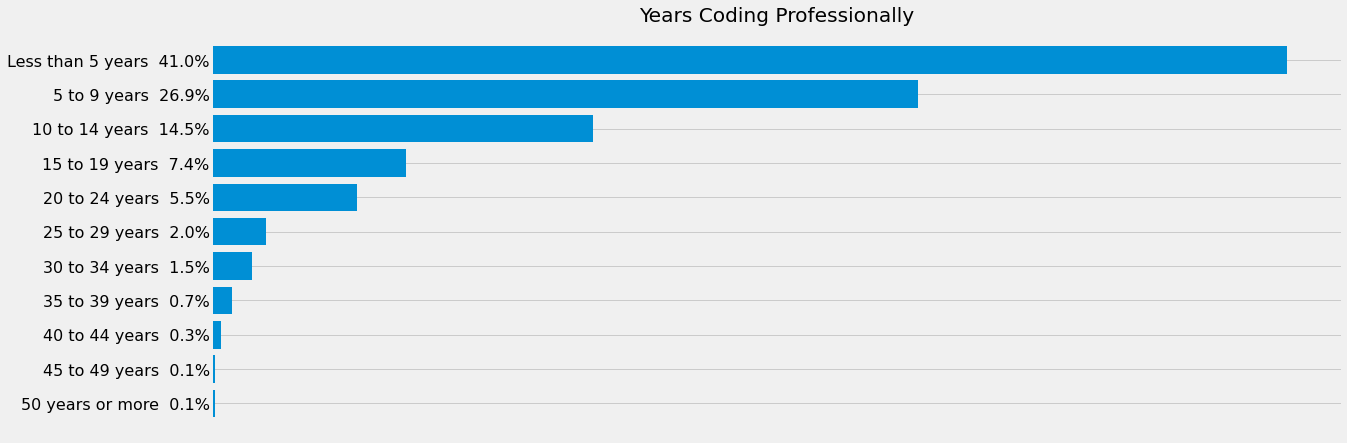

In [145]:
YearsCodePro = data["YearsCodePro"]   # ვიღებ საჭირო იფორმაციის სვეტს
YearsCodePro=YearsCodePro.dropna()  # ვფილტრავ სიცარიელეებისკან

full_info = {}   # ვქმნი დიქშინარის სადაც შევძლებ პასუხების ჩასმას

def Stacking():   # ეს ფუქნცია ალაგებს ცვლადებს

    global full_info

    Less_than_5 = []
    from_5_9 = []
    from_10_14 = []
    from_15_19 = []
    from_20_24 = []
    from_25_29 = []
    from_30_34 = []
    from_35_39 = []
    from_40_44 = []
    from_45_49 = []
    more_50 = []



    for i in YearsCodePro:   #გამნაწილებელი ფუქნცია

        if i in ["1", "2" ,"3" ,"4", "Less than 1 year"]:
            Less_than_5.append(i)
        elif i in ["5","6","7","8","9"]:
            from_5_9.append(i)
        elif i in ["10","11","12","13","14"]:
            from_10_14.append(i)
        elif i in ["15","16","17","18","19"]:
            from_15_19.append(i)
        elif i in ["20","21","22","23","24"]:
            from_20_24.append(i)
        elif i in ["25","26","27","28","29"]:
            from_25_29.append(i)
        elif i in ["30","31","32","33","34"]:
            from_30_34.append(i)
        elif i in ["35","36","37","38","39"]:
            from_35_39.append(i)
        elif i in ["40","41","42","43","44"]:
            from_40_44.append(i)
        elif i in ["45","46","47","48","49"]:
            from_45_49.append(i)
        else :
            more_50.append(i)
    

    Less_than_5 = len(Less_than_5) 
    from_5_9 = len(from_5_9) 
    from_10_14 = len(from_10_14) 
    from_15_19 = len(from_15_19) 
    from_20_24 = len(from_20_24) 
    from_25_29 = len(from_25_29) 
    from_30_34 = len(from_30_34) 
    from_35_39 = len(from_35_39) 
    from_40_44 = len(from_40_44) 
    from_45_49 = len(from_45_49) 
    more_50 = len(more_50) 

    full_info["Less than 5 years"] = Less_than_5
    full_info["5 to 9 years"] = from_5_9
    full_info["10 to 14 years"] = from_10_14
    full_info["15 to 19 years"] = from_15_19
    full_info["20 to 24 years"] = from_20_24
    full_info["25 to 29 years"] = from_25_29
    full_info["30 to 34 years"] = from_30_34
    full_info["35 to 39 years"] = from_35_39
    full_info["40 to 44 years"] = from_40_44
    full_info["45 to 49 years"] = from_45_49
    full_info["50 years or more"] = more_50


Stacking()  

full_info = dict(reversed(list(full_info.items())))  # ვაბრუნებთ დიქშინარის რომ დალაგებულად მივიღოთ პასუხები

key_Phrases=[]      # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]         # ვქმნით რაოდენოის შესანახ ლისთს

for i in full_info:    #ვანაწილებთ ლისთებში
    key_Phrases.append(i)       # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(full_info[i]) # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, YearsCodePro ,"fivethirtyeight", False , (18,7), "Years Coding Professionally")  # ვაგებთ გრაფიკს




                                                    Writing That First Line of Code

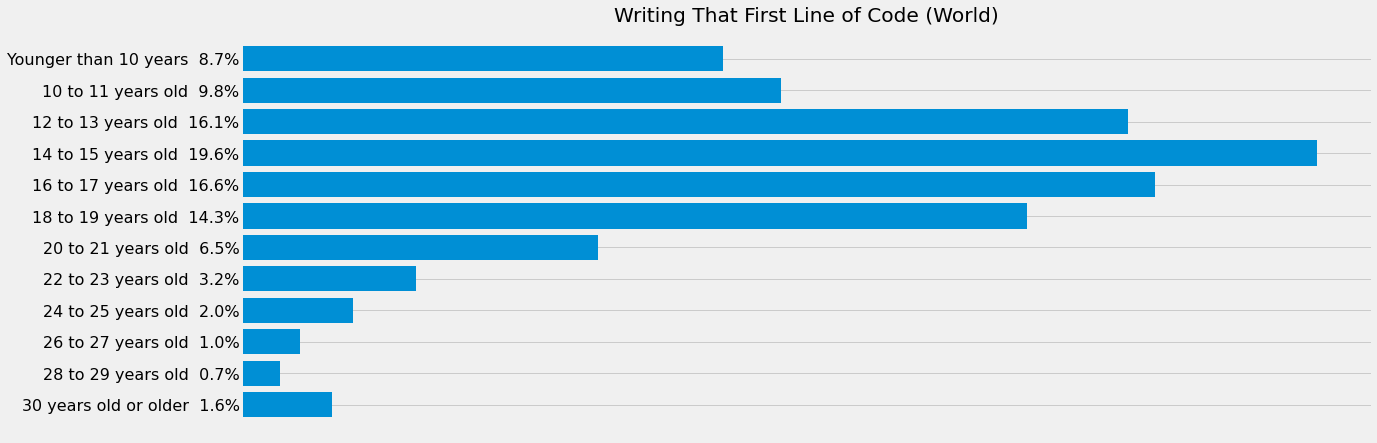

In [146]:

Age1stCode = data["Age1stCode"]  # ვიღებ საჭირო იფორმაციის სვეტს

Age1stCode = Age1stCode.dropna()  # ვფილტრავ სიცარიელეებისკან

full_info = {}   # ვქმნი დიქშინარის სადაც შევძლებ პასუხების ჩასმას


def Stacking():   # ეს ფუქნცია ალაგებს ცვლადებს

    global full_info

    Less_than_10 = []
    from_10_11 = []
    from_12_13 = []
    from_14_15 = []
    from_16_17 = []
    from_18_19 = []
    from_20_21 = []
    from_22_23 = []
    from_24_25 = []
    from_26_27 = []
    from_28_29 = []
    more_30= []



    for i in Age1stCode:   #გამნაწილებელი ფუქნცია

        if i in ["1", "2" ,"3" ,"4","5","6","7","8","9", "Younger than 5 years"]:
            Less_than_10.append(i)
        elif i in ["10","11"]:
            from_10_11.append(i)
        elif i in ["12","13"]:
            from_12_13.append(i)
        elif i in ["14","15"]:
            from_14_15.append(i)
        elif i in ["16","17"]:
            from_16_17.append(i)
        elif i in ["18","19"]:
             from_18_19.append(i)
        elif i in ["20","21"]:
            from_20_21.append(i)
        elif i in ["22","23"]:
            from_22_23.append(i)
        elif i in ["24","25"]:
            from_24_25.append(i)
        elif i in ["26","27"]:
            from_26_27.append(i)
        elif i in ["28","29"]:
            from_28_29.append(i)
        else :
            more_30.append(i)
    

        aLess_than_10 = len(Less_than_10) 
        afrom_10_11 = len(from_10_11) 
        afrom_12_13 = len(from_12_13) 
        afrom_14_15 = len(from_14_15) 
        afrom_16_17 = len(from_16_17) 
        afrom_18_19 = len(from_18_19) 
        afrom_20_21 = len(from_20_21) 
        afrom_22_23 = len(from_22_23) 
        afrom_24_25 = len(from_24_25) 
        afrom_26_27 = len(from_26_27) 
        afrom_28_29 = len(from_28_29) 
        amore_30 = len(more_30) 

        full_info["Younger than 10 years"] = aLess_than_10
        full_info["10 to 11 years old"] = afrom_10_11
        full_info["12 to 13 years old"] = afrom_12_13
        full_info["14 to 15 years old"] = afrom_14_15
        full_info["16 to 17 years old"] = afrom_16_17
        full_info["18 to 19 years old"] = afrom_18_19
        full_info["20 to 21 years old"] = afrom_20_21
        full_info["22 to 23 years old"] = afrom_22_23
        full_info["24 to 25 years old"] = afrom_24_25
        full_info["26 to 27 years old"] = afrom_26_27
        full_info["28 to 29 years old"] = afrom_28_29
        full_info["30 years old or older"] = amore_30




Stacking()  



full_info = dict(reversed(list(full_info.items())))  # ვაბრუნებთ დიქშინარის რომ დალაგებულად მივიღოთ პასუხები

key_Phrases=[]      # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]         # ვქმნით რაოდენოის შესანახ ლისთს

for i in full_info:    #ვანაწილებთ ლისთებში
    key_Phrases.append(i)       # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(full_info[i]) # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, Age1stCode ,"fivethirtyeight", False , (18,7), "Writing That First Line of Code (World)")  # ვაგებთ გრაფიკს


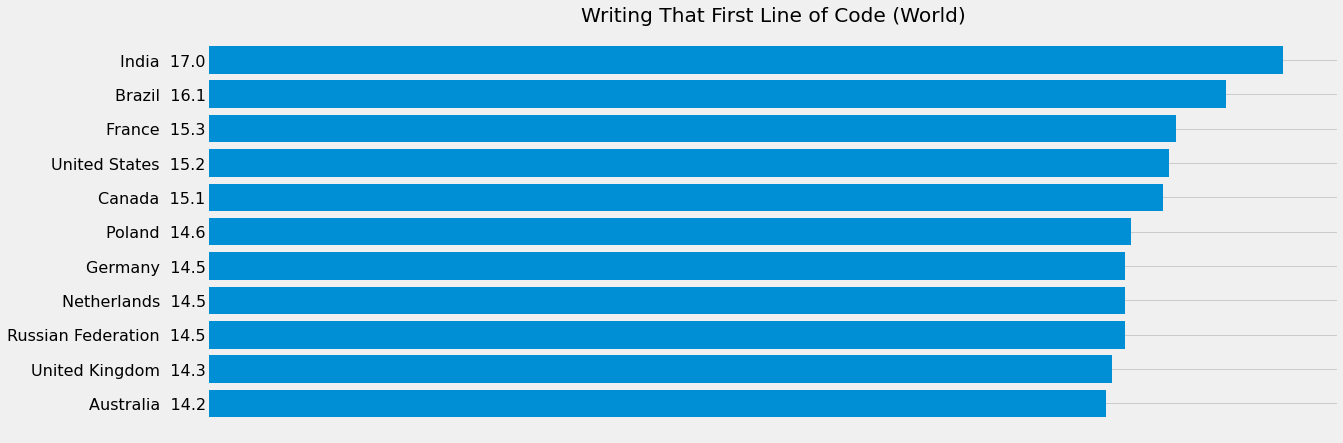

In [147]:
Age1stCode = data["Age1stCode"]     # ვიღებ საჭირო იფორმაციის სვეტს

Age1stCode = Age1stCode.dropna()   # ვფილტრავ სიცარიელეებისკან


Countries = ["India"  , "Brazil" , "France" , "United States" , "Canada" , "Poland" , "Germany" , "Netherlands" , "Russian Federation" , "United Kingdom" , "Australia"]


key_Phrases=[]      # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]         # ვქმნით რაოდენოის შესანახ ლისთს



for i in Countries:

    new_data =data[(Age1stCode != "NaN") & (data["Country"] == i)]


    new_list = np.array(new_data["Age1stCode"])   # ნამპაის ვიყენებთ სიის წარმოსაჩენად 
    new_list = np.where(new_list == "Younger than 5 years", 5, new_list)  # ცვლადს ვანაცვლებთ მეორე ცვლადით 
    new_list = np.where(new_list == "Older than 85", 85, new_list)   # ცვლადს ვანაცვლებთ მეორე ცვლადით 



    new_list = list(map(int, new_list))   # ვლადები შენახულია სტრინგებში და გადაგვყავს ინტეჯერებში


    length = len(new_list)  # ვითვლით გამოკითხულთა რაოდენობას 
    counted  = sum(new_list)     # ვითვლით მთლიან ასაკს


    avarage_age = round( counted / length  , 1)   # ვითვლით საშუალო ასაკს


    key_Phrases.append(i)       # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(avarage_age) # ვანაწილებთ რაოდენოის შესანახ ლისთში

    

key_Phrases.reverse()  # ვატრიალებთ სიებს რათა ლამაზად დალაგდეს
Quantity.reverse()  # ვატრიალებთ რათა სინქრონში მოვიდეს პირველთან

Build_Barh_sizes_withot_percent( key_Phrases , Quantity ,"fivethirtyeight", False , (18,7), "Writing That First Line of Code (World)")  # ვაგებთ გრაფიკს

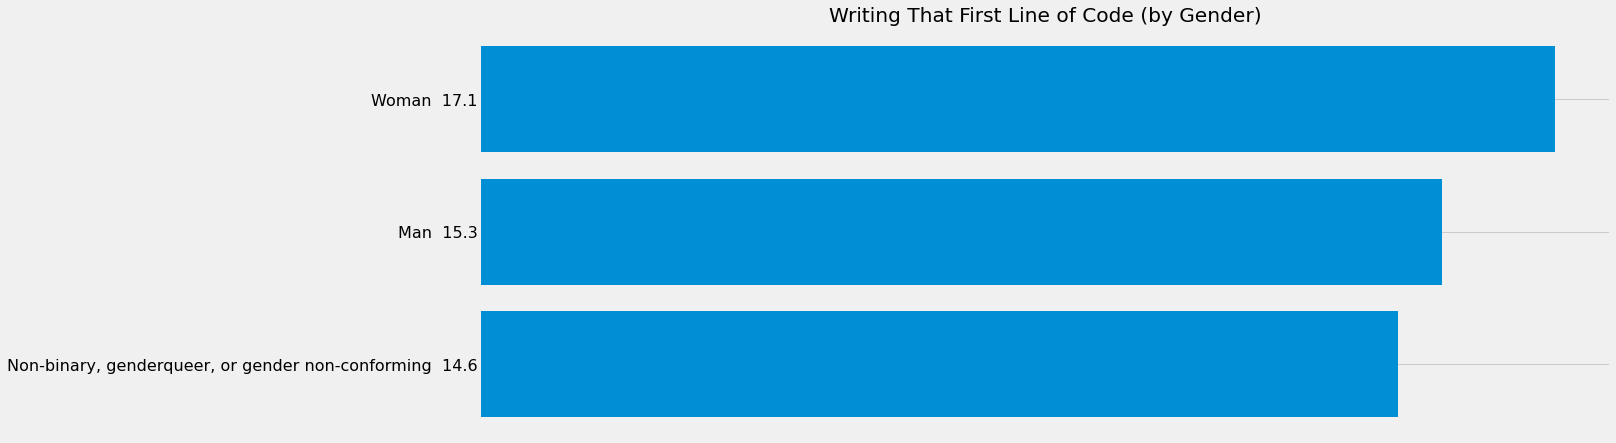

In [148]:
Age1stCode = data["Age1stCode"]     # ვიღებ საჭირო იფორმაციის სვეტს

Age1stCode = Age1stCode.dropna()   # ვფილტრავ სიცარიელეებისკან

Gender =  ["Woman" , "Man" , "Non-binary, genderqueer, or gender non-conforming"]

key_Phrases=[]      # ვქმნით ფრაზების შესანახ ლისთს
Quantity=[]         # ვქმნით რაოდენოის შესანახ ლისთს



for i in Gender:
    new_data =data[(Age1stCode != "NaN") & (data["Gender"] == i)]

    new_list = np.array(new_data["Age1stCode"])   # ნამპაის ვიყენებთ სიის წარმოსაჩენად 
    new_list = np.where(new_list == "Younger than 5 years", 5, new_list)  # ცვლადს ვანაცვლებთ მეორე ცვლადით 
    new_list = np.where(new_list == "Older than 85", 85, new_list)   # ცვლადს ვანაცვლებთ მეორე ცვლადით 

    
    new_list = list(map(int, new_list))   # ვლადები შენახულია სტრინგებში და გადაგვყავს ინტეჯერებში


    length = len(new_list)  # ვითვლით გამოკითხულთა რაოდენობას 
    counted  = sum(new_list)     # ვითვლით მთლიან ასაკს


    
    avarage_age = round( counted / length  , 1)   # ვითვლით საშუალო ასაკს


    key_Phrases.append(i)       # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(avarage_age) # ვანაწილებთ რაოდენოის შესანახ ლისთში

    

key_Phrases.reverse()  # ვატრიალებთ სიებს რათა ლამაზად დალაგდეს
Quantity.reverse()  # ვატრიალებთ რათა სინქრონში მოვიდეს პირველთან


Build_Barh_sizes_withot_percent( key_Phrases , Quantity ,"fivethirtyeight", False , (18,7), "Writing That First Line of Code (by Gender)")  # ვაგებთ გრაფიკს



                                                   How Many Developers are Students

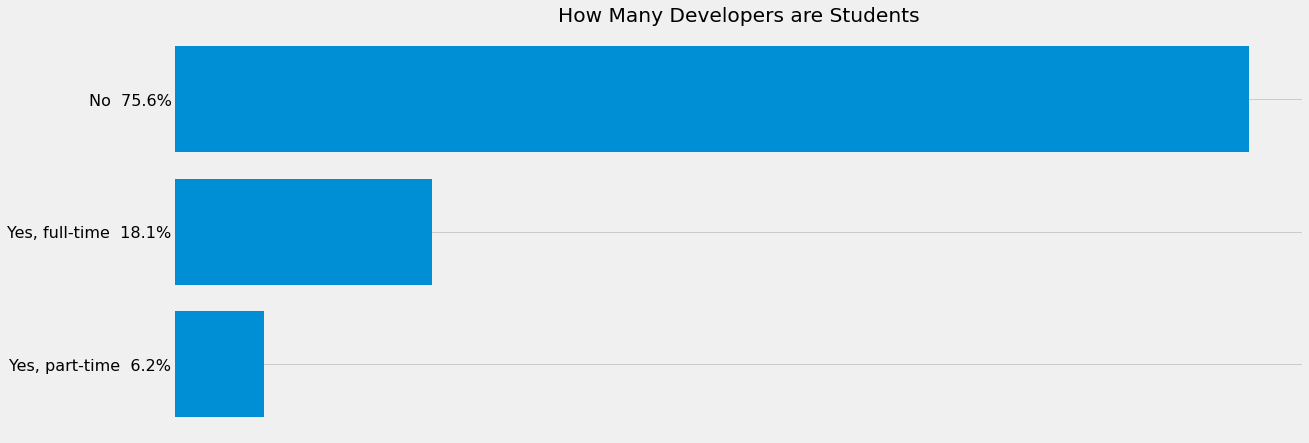

In [149]:
Student = data["Student"]     # ვიღებ საჭირო იფორმაციის სვეტს

Student = Student.dropna()   # ვფილტრავ სიცარიელეებისკან


Counted_student = Counter(Student)    # ვჯამავთ ერთი და იმავე ინფორამციას

sorted_Counted_student  = sort_dict_by_value(Counted_student , reverse = False)    # ვალაგებთ ზრდის-კლების მიხედვით Counted_student-ის პასუხებს.


key_Phrases = []   # ვქმნით ფრაზების შესანახ ლისთს
Quantity = []    # ვქმნით რაოდენოის შესანახ ლისთს


for i in sorted_Counted_student:    #ვანაწილებთ ლისთებში
    key_Phrases.append(i)       # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(Counted_student[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში



Build_Barh_sizes( key_Phrases , Quantity, Student ,"fivethirtyeight", False , (18,7), "How Many Developers are Students")  # ვაგებთ გრაფიკს

                                                        Educational Attainment

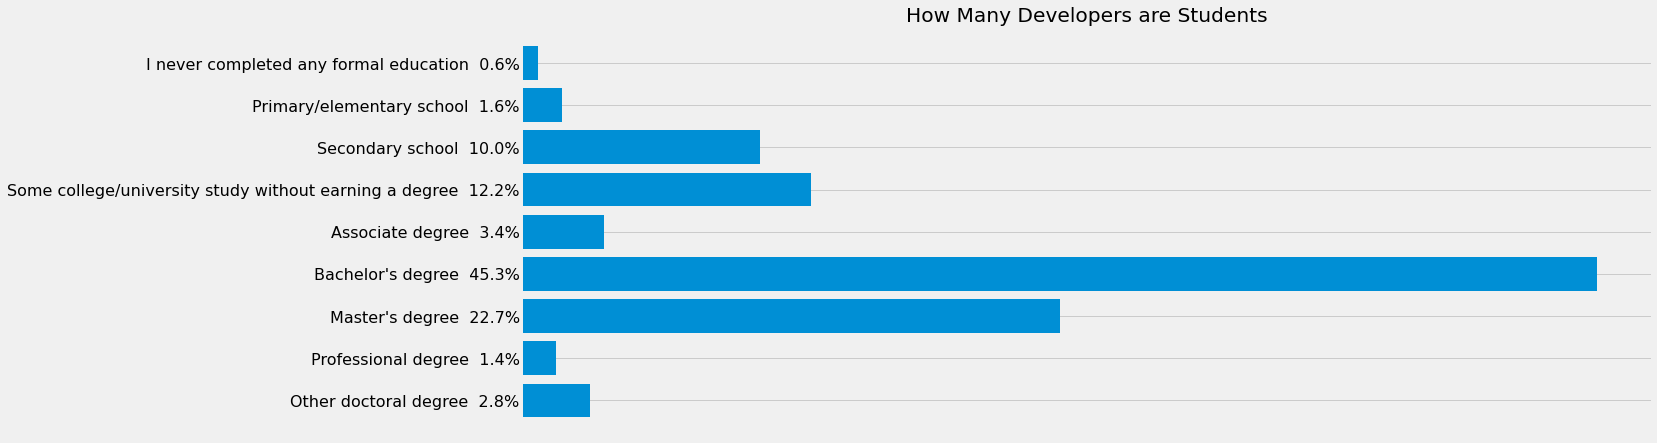

In [150]:
EdLevel = data["EdLevel"]     # ვიღებ საჭირო იფორმაციის სვეტს

EdLevel = EdLevel.dropna()   # ვფილტრავ სიცარიელეებისკან



EdLevel = np.where(EdLevel == "Professional degree (JD, MD, etc.)",    "Professional degree", EdLevel)  # ცვლადს ვანაცვლებთ მეორე ცვლადით 
EdLevel = np.where(EdLevel == "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",   "Secondary school", EdLevel)  # ცვლადს ვანაცვლებთ მეორე ცვლადით 
EdLevel = np.where(EdLevel == "Bachelor’s degree (BA, BS, B.Eng., etc.)",     "Bachelor's degree", EdLevel)  # ცვლადს ვანაცვლებთ მეორე ცვლადით 
EdLevel = np.where(EdLevel == "Master’s degree (MA, MS, M.Eng., MBA, etc.)",     "Master's degree", EdLevel)  # ცვლადს ვანაცვლებთ მეორე ცვლადით 
EdLevel = np.where(EdLevel == "Other doctoral degree (Ph.D, Ed.D., etc.)",     "Other doctoral degree", EdLevel)  # ცვლადს ვანაცვლებთ მეორე ცვლადით 


Counted_EdLevel = Counter(EdLevel)  # ვჯამავთ ერთი და იმავე ინფორამციას

lCE = list(Counted_EdLevel.items())    # დიქშინარი გადამყავს ლისთში რო ვატარო მანიპულაციები

new_sorted_list = []    # ვქმნი ახალ ლისთს რათა დავალაკო წყობა


new_sorted_list.append(lCE[5])  # ვალაგებ წყობის მიხედით
new_sorted_list.append(lCE[-2])  # ვალაგებ წყობის მიხედით
new_sorted_list.append(lCE[4])  # ვალაგებ წყობის მიხედით
new_sorted_list.append(lCE[2])  # ვალაგებ წყობის მიხედით
new_sorted_list.append(lCE[-3])  # ვალაგებ წყობის მიხედით
new_sorted_list.append(lCE[3])  # ვალაგებ წყობის მიხედით
new_sorted_list.append(lCE[1])  # ვალაგებ წყობის მიხედით
new_sorted_list.append(lCE[0])  # ვალაგებ წყობის მიხედით
new_sorted_list.append(lCE[-1])  # ვალაგებ წყობის მიხედით

new_sorted_list = dict(new_sorted_list)    # გადამყავს უკან დიქშინარიში




key_Phrases = []    # ვქმნით ფრაზების შესანახ ლისთს
Quantity = []       # ვქმნით რაოდენოის შესანახ ლისთს


for i in new_sorted_list:     #ვანაწილებთ ლისთებში
    key_Phrases.append(i)     # ვანაწილებთ ფრაზების შესანახ ლისთში
    Quantity.append(new_sorted_list[i])  # ვანაწილებთ რაოდენოის შესანახ ლისთში


Build_Barh_sizes( key_Phrases , Quantity, EdLevel ,"fivethirtyeight", False , (18,7), "How Many Developers are Students")  # ვაგებთ გრაფიკს
